# Лабораторная работа №4
## Выполнил студент группы Суроп Максим Андреевич БВТ2005

Реализовать следующие структуры данных:
  
● <b> Стек (stack): </b>  
Операции для стека: 
<i> инициализация, проверка на пустоту, добавление нового элемента в начало, извлечение элемента из начала;  </i>  
  
● <b> Дек (двусторонняя очередь, deque):  </b>  
Операции для дека: 
<i> инициализация, проверка на пустоту, добавление нового элемента в начало, добавление нового элемента в конец, извлечение элемента из начала, извлечение элемента из конца. </i>  
  
<i> Разработать программу обработки данных, содержащихся в заранее подготовленном txt-файле, в соответствии с заданиями, применив указанную в задании структуру данных. Результат работы программы вывести на экран и сохранить в отдельном txt-файле. </i>

In [1]:
class stack():
    def __init__(self, data = []):
        self.stack = data
    def is_empty(self):
        if len(self.stack):
            return False
        return True
    def append(self, item):
        self.stack.append(item)
    def pop(self):
        if self.is_empty():
            return None
        return self.stack.pop()

class deque():
    def __init__(self, data = []):
        self.deque = data
    def is_empty(self):
        if len(self.deque):
            return False
        return True
    def append_l(self, item):
        self.deque.insert(0, item)
    def append_r(self, item):
        self.deque.append(item)
    def pop_l(self):
        if self.is_empty():
            return None
        return self.deque.pop(0)
    def pop_r(self):
        if self.is_empty():
            return None
        return self.deque.pop()

### Задание №1
Отсортировать строки файла, содержащие названия книг, в алфавитном порядке с использованием двух деков.

In [2]:
def readfile(filename):
    with open(filename, "r", encoding = "utf-8") as file:
        return file.readlines()
def printlines(text):
    for elem in text:
        print(elem, end = '')
def deque_sort(arr):
    original_books = deque()
    original_books.deque = arr.copy()
    sorted_books = deque()
    while not original_books.is_empty():
        min = original_books.deque[-1]
        for i in original_books.deque:
            original_books.append_l(original_books.pop_r())
            if original_books.deque[-1] < min:
                min = original_books.deque[-1]
        while original_books.deque[-1] != min:
            original_books.append_l(original_books.pop_r())
        sorted_books.append_r(original_books.pop_r())
    return sorted_books.deque
strs = readfile("sample.txt")
print("books:")
printlines(strs)
print("\nsorted books:")
printlines(deque_sort(strs))

books:
Война и мир
Отверженные
Ревизор
Звук и ярость
Человек павук
Распад
sorted books:
Война и мир
Звук и ярость
Отверженные
РаспадРевизор
Человек павук


### Задание №2
Дек содержит последовательность символов для шифровки сообщений. Дан текстовый файл, содержащий зашифрованное сообщение. Пользуясь деком, расшифровать текст. 
Известно, что при шифровке каждый символ сообщения заменялся следующим за ним в деке по часовой стрелке через один.

In [4]:
def decrypting(message, alphabet_arr):
    alphabet=deque()
    alphabet.deque = alphabet_arr.copy()
    decryption = ""
    for char in message:
        for i in alphabet.deque:
            if alphabet.deque[-1]==char:
                alphabet.append_r(alphabet.pop_l())
                alphabet.append_r(alphabet.pop_l())
                decryption += alphabet.deque[-1]
                break
            else:
                alphabet.append_l(alphabet.pop_r())
    return decryption
with open ("sample2.txt", "r", encoding = "utf-8") as file:
    message = file.read()
alphabet = list(set(message))
decryption = decrypting(message, alphabet)
print (f"Original message: {message}")
print (f"Alphabet: {alphabet}")
print (f"Decrypted message: {decryption}")

Original message: азд иоВтрне
Alphabet: ['а', 'р', 'т', 'з', 'и', 'о', 'В', ' ', 'д', 'н', 'е']
Decrypted message: тоенВ дизар


### Задание №3
Даны три стержня и n дисков различного размера. Диски можно надевать на стержни, образуя из них башни. Перенести n дисков со стержня А на стержень С, сохранив их первоначальный порядок. При переносе дисков необходимо соблюдать следующие правила:
- на каждом шаге со стержня на стержень переносить только один диск;
- диск нельзя помещать на диск меньшего размера;
- для промежуточного хранения можно использовать стержень В.
Реализовать алгоритм, используя три стека вместо стержней А, В, С. Информация о дисках хранится в исходном файле.

In [2]:
#стержни A,B,C располагаются под номерами 1,2,3 соответственно
def hanoi_tower(n, i, k):
    if n == 1:
        print(f"Перенести диск со стержня {i} на стержень {k}")
        rods[k].append(rods[i].pop())
    else:
        hanoi_tower(n - 1, i, 6 - i - k)
        print(f"Перенести диск со стержня {i} на стержень {k}")
        rods[k].append(rods[i].pop())
        hanoi_tower(n - 1, 6 - i - k, k)
def array_of_values(self):
        result = []
        for el in self.stack:
            result.append(el)
        return result      

with open ("sample3.txt", "r", encoding = "utf-8") as file:
     a = file.readline()
A = [int(item) for item in a.split()]
print(f'A tower: {A}')
rods = {1 : stack(A), 2 : stack([]), 3 : stack([])}
hanoi_tower(len(rods[1].stack), 1, 3)
C = array_of_values(rods[3])
print(f'C tower: {C}')

A tower: [1, 5, 8, 12, 15]
Перенести диск со стержня 1 на стержень 3
Перенести диск со стержня 1 на стержень 2
Перенести диск со стержня 3 на стержень 2
Перенести диск со стержня 1 на стержень 3
Перенести диск со стержня 2 на стержень 1
Перенести диск со стержня 2 на стержень 3
Перенести диск со стержня 1 на стержень 3
Перенести диск со стержня 1 на стержень 2
Перенести диск со стержня 3 на стержень 2
Перенести диск со стержня 3 на стержень 1
Перенести диск со стержня 2 на стержень 1
Перенести диск со стержня 3 на стержень 2
Перенести диск со стержня 1 на стержень 3
Перенести диск со стержня 1 на стержень 2
Перенести диск со стержня 3 на стержень 2
Перенести диск со стержня 1 на стержень 3
Перенести диск со стержня 2 на стержень 1
Перенести диск со стержня 2 на стержень 3
Перенести диск со стержня 1 на стержень 3
Перенести диск со стержня 2 на стержень 1
Перенести диск со стержня 3 на стержень 2
Перенести диск со стержня 3 на стержень 1
Перенести диск со стержня 2 на стержень 1
Перенес

### Задание №4
Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс круглых скобок в тексте, используя стек.

In [3]:
def round_bracket_balance(filename): 
    with open(filename, "r", encoding = "utf-8") as file:
        brackets = stack()
        for line in file:
            for el in line:
                if el == '(':
                    brackets.append(el)
                elif el == ')':
                    if brackets.is_empty():
                        return False
                    else:
                        brackets.pop()
    return True if brackets.is_empty() else False
print(f'is there a balance: {round_bracket_balance("sample4.txt")}')

is there a balance: True


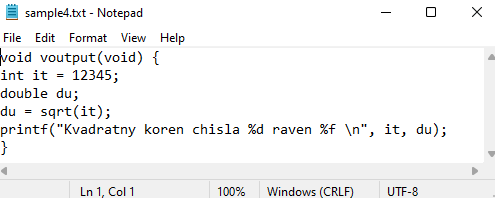

### Задание №5
Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс квадратных скобок в тексте, используя дек.

In [4]:
def square_bracket_balance(filename): 
    with open(filename, "r", encoding = "utf-8") as file:
        square_br = deque()
        for line in file:
            for el in line:
                if el == '[':
                    square_br.append_l(el)
                if el == ']':
                    square_br.append_r(el)
    while not square_br.is_empty() and square_br.deque[0] == '[' and square_br.deque[-1] == ']':
        square_br.pop_l()
        square_br.pop_r()
    return True if square_br.is_empty() else False
print(f'is there a balance: {square_bracket_balance("sample5.txt")}')

is there a balance: False


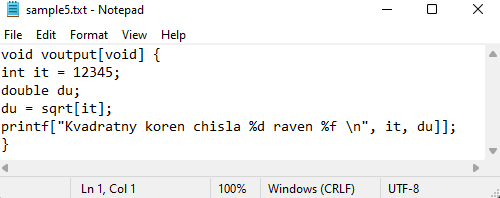

### Задание №6
Дан файл из символов. Используя стек, за один просмотр файла напечатать сначала все цифры, затем все буквы, и, наконец, все остальные символы, сохраняя исходный порядок в каждой группе символов.

In [2]:
def chars_in_file(filename):
    with open(filename, "r", encoding = "utf-8") as file:
        file_data=list(file.read())
    symbols = stack()
    symbols.stack = file_data
    symbols.stack.reverse()
    digits = []
    letters = []
    others = []
    while not symbols.is_empty():
        key = symbols.pop()
        if key.isdigit():
            digits.append(key)
        elif key.isalpha():
            letters.append(key)
        else:
            others.append(key)
    return [digits, letters, others]
text = chars_in_file("sample6.txt")
print (f"Цифры: {text[0]}")
print (f"Буквы: {text[1]}")
print (f"Остальные символы: {text[2]}")

Цифры: ['2', '3']
Буквы: ['L', 'o', 'r', 'e', 'm', 'i', 'p', 's', 'u', 'm', 'd', 'o', 'l', 'o', 'r', 's', 'i', 't', 'a', 'm', 'e', 't']
Остальные символы: [' ', ' ', ',', ' ', ' ', ' ', '.']


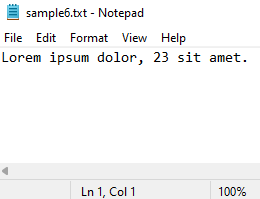

### Задание №7
Дан файл из целых чисел. Используя дек, за один просмотр файла напечатать сначала все отрицательные числа, затем все положительные числа, сохраняя исходный порядок в каждой группе.

In [8]:
def integers_in_file(filename):    
    with open(filename, "r", encoding = "utf-8") as file:
        arr=[]
        for line in file:
            temp = line.split(" ")
            for el in temp:
                arr.append(int(el))
        integers = deque([])
        for i in reversed(range(len(arr))):
            if arr[i] < 0:
                integers.append_l(arr[i])
        for i in range(len(arr)):
            if arr[i] >= 0:
                integers.append_r(arr[i])
        return integers.deque
print (f'Числа в файле: {integers_in_file("sample7.txt")}')

Числа в файле: [-12, 5, 13, 4, 16, 12]


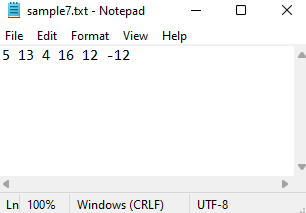

### Задание №8
Дан текстовый файл. Используя стек, сформировать новый текстовый файл, содержащий строки исходного файла, записанные в обратном порядке: первая строка становится последней, вторая – предпоследней и т.д.

In [9]:
def reversed_file(filename_read, filename_write):
    with open(filename_read, "r", encoding = "utf-8") as file:
        text = stack()
        for line in file:
            text.append(line)
        temp = text.pop()
        if temp[-1]!="\n":
            temp+="\n"
        text.append(temp)
    try:
        with open(filename_write, "w", encoding = "utf-8") as file:
            while not text.is_empty():
                file.write(text.pop())
    except FileNotFoundError:
        print("Файл не найден")
reversed_file("sample8.txt", "sample8.1.txt")

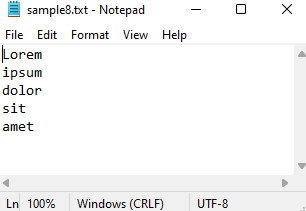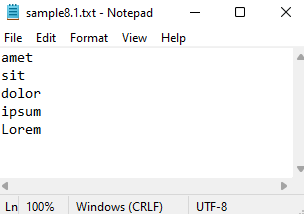